   PATIENT ID  age  gender  impluse  pressurehigh  pressurelow  glucose  \
0        1001   64       1       66           160           83      160   
1        1002   21       1       94            98           46      296   
2        1003   55       1       64           160           77      270   
3        1004   64       1       70           120           55      270   
4        1005   55       1       64           112           65      300   

     kcm  troponin  class  
0   1.80     0.012      0  
1   6.75     1.060      1  
2   1.99     0.003      0  
3  13.87     0.122      1  
4   1.08     0.003      0  
Accuracy: 86.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.90      0.75      0.82        12

    accuracy                           0.87        30
   macro avg       0.88      0.85      0.86        30
weighted avg       0.87      0.87      0.86        30


Confusion Ma

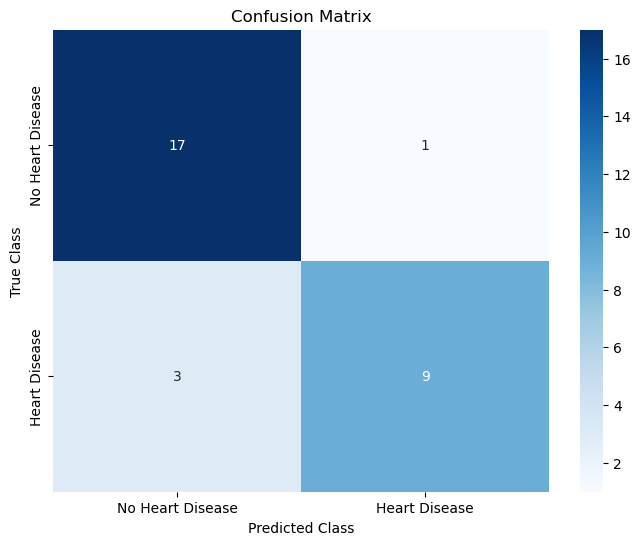


Predicted Class Labels with Patient ID and Other Attributes:
    patient_id  predicted_class  true_class
0           74                0           0
1           19                0           0
2          119                1           1
3           79                1           1
4           77                0           1
5           32                0           0
6           65                1           1
7          142                0           0
8           69                0           0
9           83                1           1
10         111                0           0
11          13                1           1
12          37                0           0
13          10                0           0
14          20                0           1
15          57                0           0
16         105                0           0
17          70                0           0
18          56                0           0
19         133                0           0
20          30

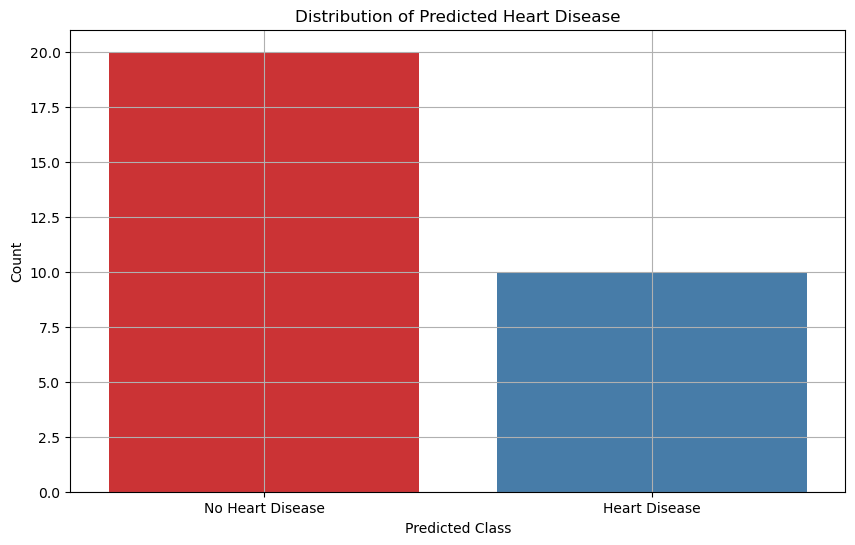

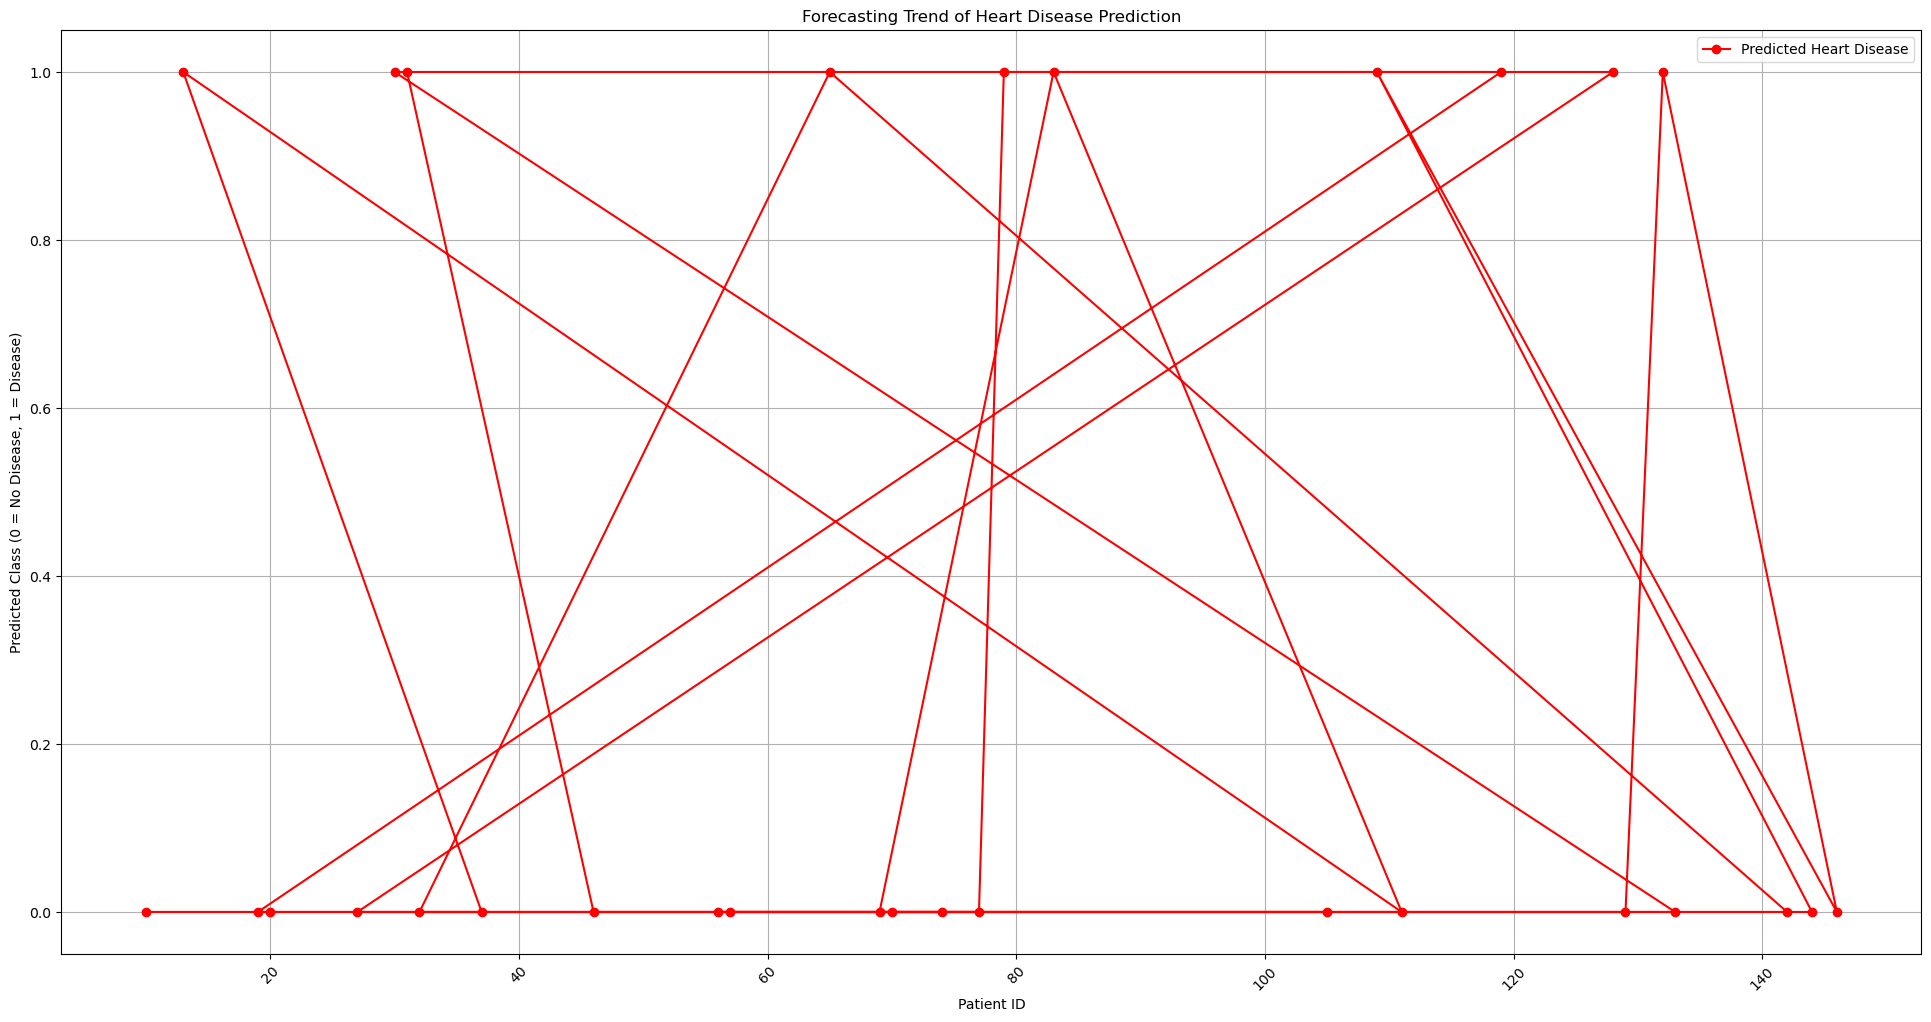


Trend Analysis Result:
Falling trend in predicted heart disease cases


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'D:/DATA SET/heart.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(data.head())  # View the first few rows of your dataset

# Assuming your dataset has a patient_id column. If not, create one
if 'patient_id' not in data.columns:
    data['patient_id'] = range(1, len(data) + 1)  # Create a patient_id column

# Split the data into features (X) and target (y)
X = data.drop(['class', 'patient_id'], axis=1)  # 'class' is the target variable, and we exclude patient_id
y = data['class']  # Class 0: No Heart Disease, Class 1: Heart Disease

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Display the predictions alongside patient_id and other attributes
results = pd.DataFrame({
    'patient_id': data.loc[X_test.index, 'patient_id'].values,  # Extract patient IDs corresponding to the test set
    'predicted_class': y_pred,  # Predicted labels
    'true_class': y_test.values  # True labels for comparison
})

# Print the results
print("\nPredicted Class Labels with Patient ID and Other Attributes:")
print(results)

# Plot the distribution of predicted classes
plt.figure(figsize=(10, 6))
sns.countplot(data=results, x='predicted_class', palette='Set1')
plt.title('Distribution of Predicted Heart Disease')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.grid(True)
plt.show()

# Forecasting report - plotting trend over patient IDs
plt.figure(figsize=(24,12))
plt.plot(results['patient_id'], results['predicted_class'], marker='o', color='red', linestyle='-', label='Predicted Heart Disease')
plt.title('Forecasting Trend of Heart Disease Prediction')
plt.xlabel('Patient ID')
plt.ylabel('Predicted Class (0 = No Disease, 1 = Disease)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Analyzing and printing the trend
# Calculate the rolling mean to smooth out fluctuations
results['rolling_mean'] = results['predicted_class'].rolling(window=10).mean()

# Check for the trend direction
if results['rolling_mean'].iloc[-1] > results['rolling_mean'].iloc[0]:
    trend = "Rising trend in predicted heart disease cases"
else:
    trend = "Falling trend in predicted heart disease cases"

print("\nTrend Analysis Result:")
print(trend)